In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Dropout
# from tensorflow.keras import Sequential
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [ ]:
train = pd.read_csv(r'Google_Stock_Price_Train.csv')

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [ ]:
train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"6,23,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"7,89,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"11,53,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"7,44,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"17,70,000"


In [ ]:
test = pd.read_csv(r'Google_Stock_Price_Test.csv')

In [ ]:
test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
test.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [ ]:
import matplotlib.pyplot as plt

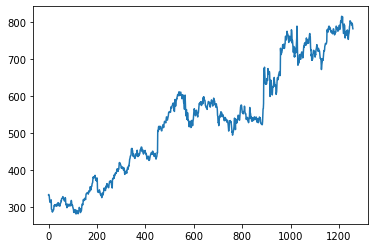

In [ ]:
plt.plot(train["High"])

In [ ]:
# plt.plot(train["Close"])

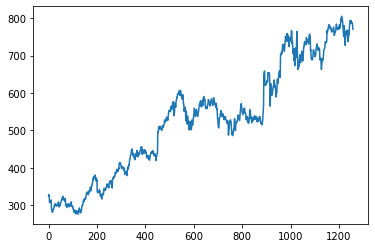

In [ ]:
plt.plot(train["Low"])

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [ ]:
train.iloc[:,1:2]

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


In [ ]:
training_set=train.iloc[:,1:2].values

In [ ]:
training_set.shape

(1258, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1)) # with StandardScaler() we do normalization while with MinMaxScaler we do min max transform
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(1258, 1)

In [ ]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
training_set_scaled.shape

(1258, 1)

In [ ]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(1198, 60)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [ ]:
#reshape it to (batche_size(#size of inputs),timesteps,input_dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# from tensorflow.keras import Sequential
from keras.layers import SimpleRNN

In [ ]:

model = Sequential()

model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(60, 1)))


##add 2nd  layer
model.add(SimpleRNN(units = 50, return_sequences = True))
# model.add(Dropout(rate = 0.2))

##add 3rd layer
model.add(SimpleRNN(units = 50, return_sequences = True))

##add 4th  layer
model.add(SimpleRNN(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

# Output Layer Regression unit=1, activatiion function =:relu, linear
model.add(Dense(units = 1, activation="relu"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 60, 50)            2600      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 17,801
Trainable params: 17,801
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
hist=model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0934
Epoch 2/50
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0405
Epoch 3/50
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0181
Epoch 4/50
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0113
Epoch 5/50
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0090
Epoch 6/50
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0067
Epoch 7/50
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0075
Epoch 8/50
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0059
Epoch 9/50
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0047A
Epoch 10/50
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0042
Epoch 11/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0052
Epoch 12/50
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0055


In [ ]:
hist.history["loss"]

[0.09336546102604007,
 0.040520672865199524,
 0.018101993377611217,
 0.011338114898608304,
 0.00900310078847264,
 0.006726960018774703,
 0.007483039522786098,
 0.005883702897126219,
 0.004727351828283927,
 0.004241520739494759,
 0.0052394722518394506,
 0.005536047134234357,
 0.003681670851812687,
 0.003949728967366936,
 0.004973841902608665,
 0.003720257062782131,
 0.0035687234363081756,
 0.003465029589041993,
 0.00388861129422655,
 0.0036285249415306197,
 0.003243876950160751,
 0.0026793323505051024,
 0.003340669545362111,
 0.002749002887673042,
 0.0037164581225926866,
 0.003944991010308067,
 0.002727245360003389,
 0.003388001691574893,
 0.0027111876057849603,
 0.0029089350816179594,
 0.0033610592870654318,
 0.002392742041193683,
 0.0025938161171098957,
 0.0027839975355376484,
 0.0028700719596056238,
 0.0022956404227838043,
 0.0027796547111273062,
 0.003292949441105177,
 0.002687209455268411,
 0.0030174175695592354,
 0.002625503493721701,
 0.002188118916309636,
 0.002443937442494006,


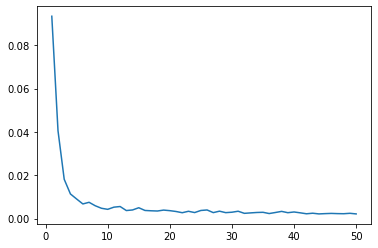

In [ ]:
plt.plot(range(1,51),hist.history["loss"])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 60, 50)            2600      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 60, 50)            5050      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 17,801
Trainable params: 17,801
Non-trainable params: 0
__________________________________________________

In [ ]:
test = pd.read_csv(r'Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values

In [ ]:
total_data=pd.concat([train['Open'],test['Open']],axis=0)
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
X_test

array([[[0.92914279],
        [0.91334921],
        [0.88550115],
        ...,
        [0.91600938],
        [0.9132934 ],
        [0.88979835]],

       [[0.91334921],
        [0.88550115],
        [0.90289456],
        ...,
        [0.9132934 ],
        [0.88979835],
        [0.86589404]],

       [[0.88550115],
        [0.90289456],
        [0.89383511],
        ...,
        [0.88979835],
        [0.86589404],
        [0.89030062]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [ ]:
predicted_stock_price=model.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [ ]:
predicted_stock_price

array([[727.26184],
       [716.8006 ],
       [723.85583],
       [736.4599 ],
       [733.0184 ],
       [736.0351 ],
       [742.8264 ],
       [750.35187],
       [754.04297],
       [757.561  ],
       [757.66895],
       [762.2298 ],
       [754.8867 ],
       [754.8441 ],
       [755.56024],
       [756.16113],
       [753.3869 ],
       [755.23096],
       [755.68054],
       [750.9398 ]], dtype=float32)

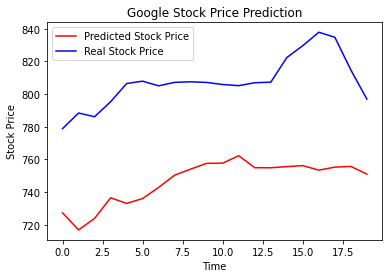

In [ ]:
#Visualization
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()